# plot2llm: Demo notebook

This notebook demonstrates how to use `plot2llm` to convert matplotlib and seaborn plots into text or JSON formats, ready to be used as context for LLMs (Large Language Models) to generate insights from data visualizations.

## Example 1 - Sales analysis in Matplotlib

In [1]:
# If running in Colab or a fresh environment, uncomment:
# !pip install --index-url https://test.pypi.org/simple/ --extra-index-url https://pypi.org/simple plot2llm

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import plot2llm

C:\Users\Asus\AppData\Local\Temp\ipykernel_29304\132303546.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range('2023-01-01', periods=12, freq='M')


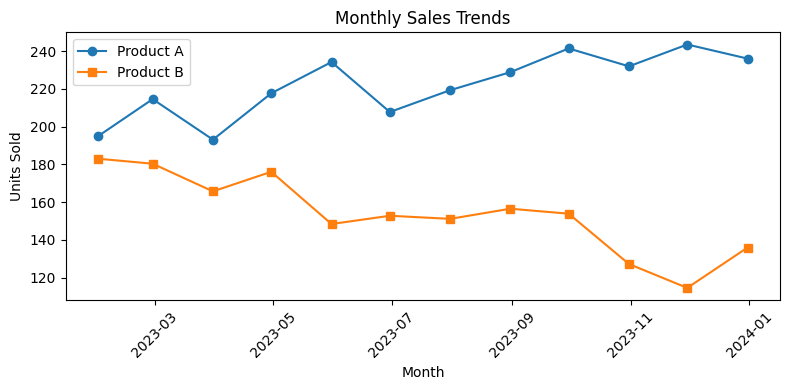

In [2]:
# Simulate monthly sales data for two products
np.random.seed(42)
months = pd.date_range('2023-01-01', periods=12, freq='M')
sales_a = np.random.poisson(lam=200, size=12) + np.linspace(0, 50, 12)
sales_b = np.random.poisson(lam=150, size=12) + np.linspace(30, -10, 12)

df_sales = pd.DataFrame({
    'Month': months,
    'Product A': sales_a,
    'Product B': sales_b
})

# Plot sales trends
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(df_sales['Month'], df_sales['Product A'], marker='o', label='Product A')
ax.plot(df_sales['Month'], df_sales['Product B'], marker='s', label='Product B')
ax.set_title('Monthly Sales Trends')
ax.set_xlabel('Month')
ax.set_ylabel('Units Sold')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [3]:
# Convert the plot to text for LLM analysis
sales_text = plot2llm.convert(fig, format='text')
print("Textual description for LLM:\n")
print(sales_text)

# Example prompt for LLM
print("\n---\n")
print("Prompt for LLM:")
print(f"Given the following sales data visualization description, provide key business insights and trends:\n\n{sales_text}")

Textual description for LLM:

Plot types in figure: line
Figure type: matplotlib.Figure
Dimensions (inches): [8.0, 4.0]
Title: Monthly Sales Trends
Number of axes: 1

Axis 0: title=Monthly Sales Trends, plot types: [line]
  X-axis: Month (type: DATE)
  Y-axis: Units Sold (type: NUMERIC)
  Ranges: x=None, y=None
  Properties: grid=False, legend=True
  Curve points:
    Point 1: [Product A] x=date: ['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30', '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31', '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31'], y=[195.0, 214.54545454545453, 193.0909090909091, 217.63636363636363, 234.1818181818182, 207.72727272727272, 219.27272727272728, 228.8181818181818, 241.36363636363637, 231.9090909090909, 243.45454545454547, 236.0]
    Point 2: [Product B] x=date: ['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30', '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31', '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31'], y=[183.0, 180.

## Example 2 - Correlation analysis in Seaborn

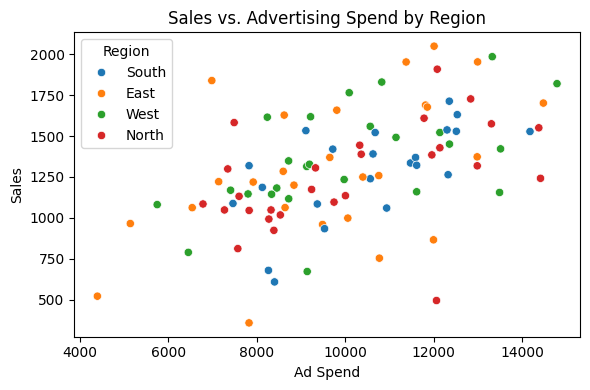

In [4]:
# Simulate data: advertising spend vs. sales
np.random.seed(123)
n = 100
ad_spend = np.random.normal(10000, 2000, n)
sales = ad_spend * 0.08 + np.random.normal(500, 300, n)
region = np.random.choice(['North', 'South', 'East', 'West'], n)

df_ads = pd.DataFrame({
    'Ad Spend': ad_spend,
    'Sales': sales,
    'Region': region
})

# Visualize correlation with Seaborn
fig2, ax2 = plt.subplots(figsize=(6, 4))
sns.scatterplot(data=df_ads, x='Ad Spend', y='Sales', hue='Region', ax=ax2)
ax2.set_title('Sales vs. Advertising Spend by Region')
plt.tight_layout()
plt.show()

In [5]:
# Convert the seaborn plot to text for LLM analysis
ads_text = plot2llm.convert(fig2, format='text')
print("Textual description for LLM:\n")
print(ads_text)

# Example prompt for LLM
print("\n---\n")
print("Prompt for LLM:")
print(f"Given the following visualization description, summarize the relationship between advertising spend and sales, and comment on any regional differences:\n\n{ads_text}")

Textual description for LLM:

Keywords in figure: scatter
Plot types in figure: line, scatter
Figure type: matplotlib.Figure
Dimensions (inches): [6.0, 4.0]
Title: Sales vs. Advertising Spend by Region
Number of axes: 1

Axis 0: title=Sales vs. Advertising Spend by Region, plot types: [line, scatter]
  X-axis: Ad Spend (type: CATEGORY)
  Y-axis: Sales (type: CATEGORY)
  Ranges: x=None, y=None
  Properties: grid=False, legend=True
  Curve points:
    Point 1: [South] x=categories: [], y=[]
    Point 2: [East] x=categories: [], y=[]
    Point 3: [West] x=categories: [], y=[]
    Point 4: [North] x=categories: [], y=[]
    Point 5: [_child0] x=categories: [7828.7387933988775, 11994.690893167171, 10565.956996103983, 6987.410572163816, 8842.799496062928, 13302.873074194302, 5146.641513213852, 9142.174742287645, 12531.872517411068, 8266.519195469797, 8642.227696755892, 9810.582062126217, 12982.779252248576, 8722.196006630698, 9112.036080707869, 9131.297448762965, 14411.860165450911, 14373.57

## Bar Chart: Product Category Sales

A bar chart showing total sales for different product categories in a retail store.

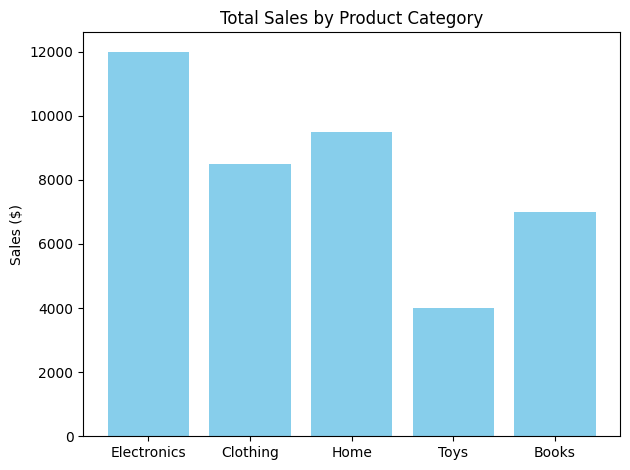

In [6]:
import matplotlib.pyplot as plt
import numpy as np

categories = ['Electronics', 'Clothing', 'Home', 'Toys', 'Books']
sales = [12000, 8500, 9500, 4000, 7000]

fig_bar, ax_bar = plt.subplots()
ax_bar.bar(categories, sales, color='skyblue')
ax_bar.set_title('Total Sales by Product Category')
ax_bar.set_ylabel('Sales ($)')
plt.tight_layout()
plt.show()

In [7]:
bar_text = plot2llm.convert(fig_bar, format='text')
print(bar_text)

print("\nPrompt for LLM:")
print(f"Given the following bar chart description, summarize which product categories are performing best and suggest possible business actions:\n\n{bar_text}")

Keywords in figure: bar, category
Category detected in xlabels
Plot types in figure: bar
Figure type: matplotlib.Figure
Dimensions (inches): [6.4, 4.8]
Title: Total Sales by Product Category
Number of axes: 1

Axis 0: title=Total Sales by Product Category, plot types: [bar]
  X-axis:  (type: CATEGORY)
  Y-axis: Sales ($) (type: NUMERIC)
  Ranges: x=None, y=None
  Properties: grid=False, legend=False
  Curve points:
    Point 1: [_nolegend_] x=categories: ['Electronics'], y=[12000]
    Point 2: [_nolegend_] x=categories: ['Clothing'], y=[8500]
    Point 3: [_nolegend_] x=categories: ['Home'], y=[9500]
    Point 4: [_nolegend_] x=categories: ['Toys'], y=[4000]
    Point 5: [_nolegend_] x=categories: ['Books'], y=[7000]

Data points: None
Data types: None
Axis 0 (Total Sales by Product Category): mean=8200.0, std=2657.0660511172846, min=4000.0, max=12000.0, median=8500.0, skewness=-0.19958540906722438, kurtosis=-0.8949313452479362, outliers=0

Colors: ['#87ceeb (skyblue)']
Markers: []
Lin

## Pie Chart: Market Share by Brand

A pie chart representing the market share of different smartphone brands.

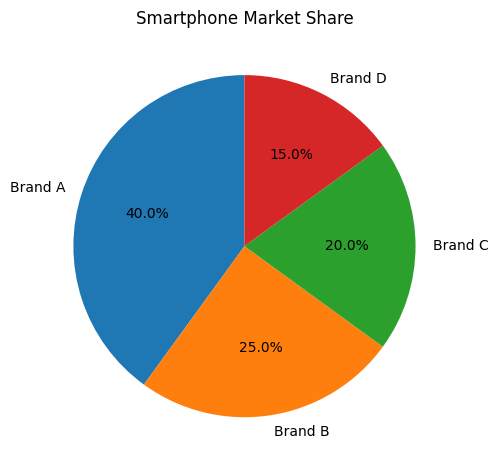

In [8]:
brands = ['Brand A', 'Brand B', 'Brand C', 'Brand D']
market_share = [40, 25, 20, 15]

fig_pie, ax_pie = plt.subplots()
ax_pie.pie(market_share, labels=brands, autopct='%1.1f%%', startangle=90)
ax_pie.set_title('Smartphone Market Share')
plt.tight_layout()
plt.show()

In [9]:
pie_text = plot2llm.convert(fig_pie, format='text')
print(pie_text)

print("\nPrompt for LLM:")
print(f"Given the following pie chart description, analyze the market distribution and discuss competitive strategies:\n\n{pie_text}")

Keywords in figure: bar
Plot types in figure: bar
Figure type: matplotlib.Figure
Dimensions (inches): [6.4, 4.8]
Title: Smartphone Market Share
Number of axes: 1

Axis 0: title=Smartphone Market Share, plot types: [bar]
  X-axis:  (type: NUMERIC)
  Y-axis:  (type: NUMERIC)
  Ranges: x=None, y=None
  Properties: grid=False, legend=False

Data points: None
Data types: None
Axis 0 (Smartphone Market Share): no data

Colors: ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
Markers: []
Line styles: None
Background color: None

Prompt for LLM:
Given the following pie chart description, analyze the market distribution and discuss competitive strategies:

Keywords in figure: bar
Plot types in figure: bar
Figure type: matplotlib.Figure
Dimensions (inches): [6.4, 4.8]
Title: Smartphone Market Share
Number of axes: 1

Axis 0: title=Smartphone Market Share, plot types: [bar]
  X-axis:  (type: NUMERIC)
  Y-axis:  (type: NUMERIC)
  Ranges: x=None, y=None
  Properties: grid=False, legend=False

Data poin

## Histogram: Customer Age Distribution

A histogram showing the age distribution of customers in a subscription service.

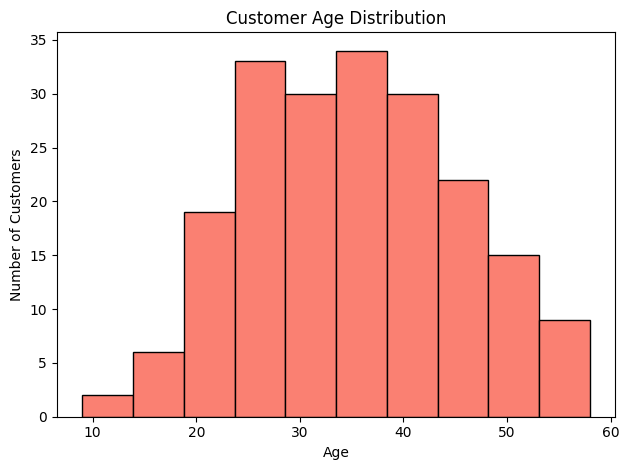

In [10]:
np.random.seed(0)
ages = np.random.normal(35, 10, 200).astype(int)

fig_hist, ax_hist = plt.subplots()
ax_hist.hist(ages, bins=10, color='salmon', edgecolor='black')
ax_hist.set_title('Customer Age Distribution')
ax_hist.set_xlabel('Age')
ax_hist.set_ylabel('Number of Customers')
plt.tight_layout()
plt.show()

In [11]:
hist_text = plot2llm.convert(fig_hist, format='text')
print(hist_text)

print("\nPrompt for LLM:")
print(f"Given the following histogram description, describe the customer base and suggest marketing strategies for different age groups:\n\n{hist_text}")

Keywords in figure: bar
Plot types in figure: bar
Figure type: matplotlib.Figure
Dimensions (inches): [6.4, 4.8]
Title: Customer Age Distribution
Number of axes: 1

Axis 0: title=Customer Age Distribution, plot types: [bar]
  X-axis: Age (type: CATEGORY)
  Y-axis: Number of Customers (type: NUMERIC)
  Ranges: x=None, y=None
  Properties: grid=False, legend=False
  Curve points:
    Point 1: [_nolegend_] x=categories: [8.999999999999998], y=[2.0]
    Point 2: [_nolegend_] x=categories: [13.9], y=[6.0]
    Point 3: [_nolegend_] x=categories: [18.799999999999997], y=[19.0]
    Point 4: [_nolegend_] x=categories: [23.700000000000003], y=[33.0]
    Point 5: [_nolegend_] x=categories: [28.6], y=[30.0]
    Point 6: [_nolegend_] x=categories: [33.5], y=[34.0]
    Point 7: [_nolegend_] x=categories: [38.400000000000006], y=[30.0]
    Point 8: [_nolegend_] x=categories: [43.3], y=[22.0]
    Point 9: [_nolegend_] x=categories: [48.2], y=[15.0]
    Point 10: [_nolegend_] x=categories: [53.09999999

## Line Chart: Website Traffic Over Time

A line chart showing daily website visits over a month.

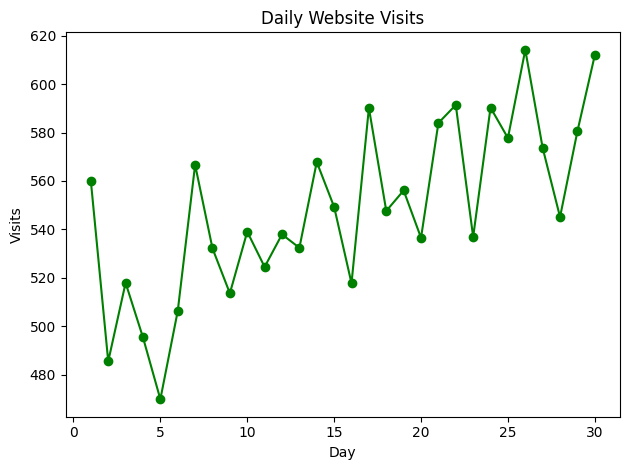

In [12]:
days = np.arange(1, 31)
visits = np.random.poisson(500, 30) + np.linspace(0, 100, 30)

fig_line, ax_line = plt.subplots()
ax_line.plot(days, visits, marker='o', color='green')
ax_line.set_title('Daily Website Visits')
ax_line.set_xlabel('Day')
ax_line.set_ylabel('Visits')
plt.tight_layout()
plt.show()

In [13]:
line_text = plot2llm.convert(fig_line, format='text')
print(line_text)

print("\nPrompt for LLM:")
print(f"Given the following line chart description, identify trends and possible causes for peaks or drops in website traffic:\n\n{line_text}")

Plot types in figure: line
Figure type: matplotlib.Figure
Dimensions (inches): [6.4, 4.8]
Title: Daily Website Visits
Number of axes: 1

Axis 0: title=Daily Website Visits, plot types: [line]
  X-axis: Day (type: NUMERIC)
  Y-axis: Visits (type: NUMERIC)
  Ranges: x=None, y=None
  Properties: grid=False, legend=False
  Curve points:
    Point 1: [_child0] x=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], y=[560.0, 485.44827586206895, 517.8965517241379, 495.3448275862069, 469.7931034482759, 506.2413793103448, 566.6896551724138, 532.1379310344828, 513.5862068965517, 539.0344827586207, 524.4827586206897, 537.9310344827586, 532.3793103448276, 567.8275862068965, 549.2758620689655, 517.7241379310344, 590.1724137931035, 547.6206896551724, 556.0689655172414, 536.5172413793103, 583.9655172413793, 591.4137931034483, 536.8620689655172, 590.3103448275862, 577.7586206896551, 614.2068965517242, 573.6551724137931, 545.1034482758621, 580

## Scatter Plot: Advertising Spend vs. Sales

A scatter plot showing the relationship between advertising spend and sales for different regions.

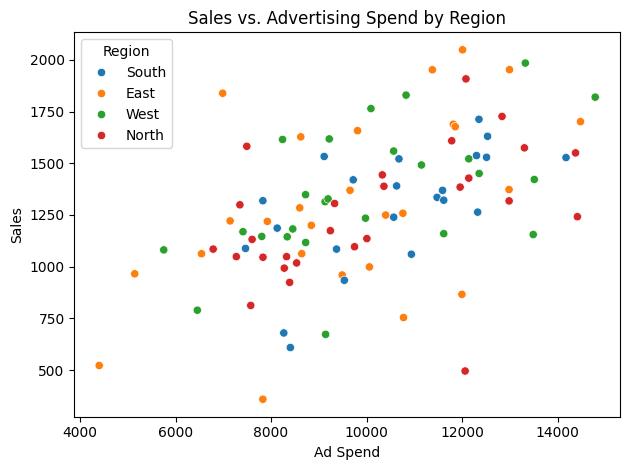

In [14]:
import pandas as pd
import seaborn as sns

np.random.seed(123)
n = 100
ad_spend = np.random.normal(10000, 2000, n)
sales = ad_spend * 0.08 + np.random.normal(500, 300, n)
region = np.random.choice(['North', 'South', 'East', 'West'], n)

df_ads = pd.DataFrame({
    'Ad Spend': ad_spend,
    'Sales': sales,
    'Region': region
})

fig_scat, ax_scat = plt.subplots()
sns.scatterplot(data=df_ads, x='Ad Spend', y='Sales', hue='Region', ax=ax_scat)
ax_scat.set_title('Sales vs. Advertising Spend by Region')
plt.tight_layout()
plt.show()

In [15]:
scat_text = plot2llm.convert(fig_scat, format='text')
print(scat_text)

print("\nPrompt for LLM:")
print(f"Given the following scatter plot description, summarize the relationship between advertising spend and sales, and comment on any regional differences:\n\n{scat_text}")

Keywords in figure: scatter
Plot types in figure: line, scatter
Figure type: matplotlib.Figure
Dimensions (inches): [6.4, 4.8]
Title: Sales vs. Advertising Spend by Region
Number of axes: 1

Axis 0: title=Sales vs. Advertising Spend by Region, plot types: [line, scatter]
  X-axis: Ad Spend (type: CATEGORY)
  Y-axis: Sales (type: CATEGORY)
  Ranges: x=None, y=None
  Properties: grid=False, legend=True
  Curve points:
    Point 1: [South] x=categories: [], y=[]
    Point 2: [East] x=categories: [], y=[]
    Point 3: [West] x=categories: [], y=[]
    Point 4: [North] x=categories: [], y=[]
    Point 5: [_child0] x=categories: [7828.7387933988775, 11994.690893167171, 10565.956996103983, 6987.410572163816, 8842.799496062928, 13302.873074194302, 5146.641513213852, 9142.174742287645, 12531.872517411068, 8266.519195469797, 8642.227696755892, 9810.582062126217, 12982.779252248576, 8722.196006630698, 9112.036080707869, 9131.297448762965, 14411.860165450911, 14373.572177947573, 12008.107795757755

## Heatmap: Correlation Matrix of Financial Indicators

A heatmap showing the correlation between different financial indicators for a set of companies.

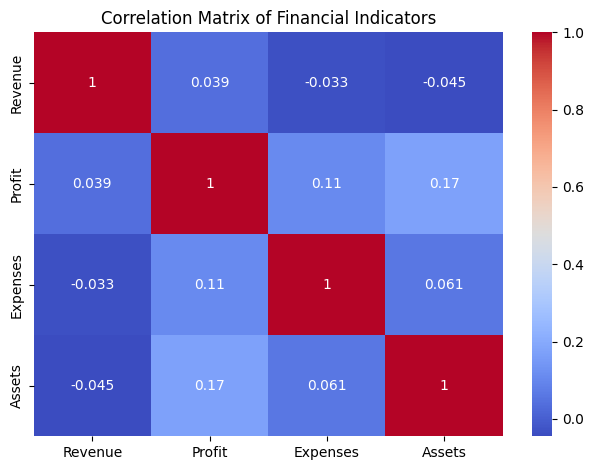

In [16]:
np.random.seed(42)
data = np.random.rand(100, 4)
df_fin = pd.DataFrame(data, columns=['Revenue', 'Profit', 'Expenses', 'Assets'])
corr = df_fin.corr()

fig_heat, ax_heat = plt.subplots()
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=ax_heat)
ax_heat.set_title('Correlation Matrix of Financial Indicators')
plt.tight_layout()
plt.show()

In [17]:
heat_text = plot2llm.convert(fig_heat, format='text')
print(heat_text)

print("\nPrompt for LLM:")
print(f"Given the following heatmap description, identify which financial indicators are most strongly correlated and discuss possible implications:\n\n{heat_text}")

Keywords in figure: scatter
Plot types in figure: scatter
Figure type: seaborn
Dimensions (inches): [6.4, 4.8]
Title: Correlation Matrix of Financial Indicators
Number of axes: 2

Axis 0: title=Correlation Matrix of Financial Indicators, plot types: [scatter]
  X-axis:  (type: category)
  Y-axis:  (type: category)
  Ranges: x=None, y=None
  Properties: grid=None, legend=None
  Curve points:
    Point 1: [_child0] x=[0.0], y=[0.0]

Axis 1: no_title, plot types: [scatter]
  X-axis:  (type: numeric)
  Y-axis:  (type: category)
  Ranges: x=None, y=None
  Properties: grid=None, legend=None
  Curve points:
    Point 1: [_child0] x=[0.0], y=[0.0]
    Point 2: [_child1] x=[0.0], y=[0.0]

Data points: None
Data types: None
Axis 0 (Correlation Matrix of Financial Indicators): mean=0.0, std=0.0, min=0.0, max=0.0, median=0.0, skewness=None, kurtosis=None, outliers=0
Axis 1 (Subplot 2): mean=0.0, std=0.0, min=0.0, max=0.0, median=0.0, skewness=None, kurtosis=None, outliers=0

Colors: []
Markers: []

## Boxplot: Salary Distribution by Department

A boxplot comparing salary distributions across different departments in a company.

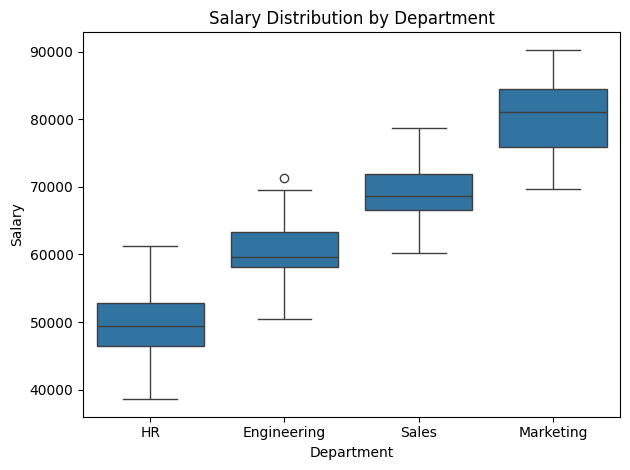

In [18]:
np.random.seed(7)
departments = ['HR', 'Engineering', 'Sales', 'Marketing']
salaries = [np.random.normal(50000 + i*10000, 5000, 50) for i in range(4)]
df_salary = pd.DataFrame({
    'Department': np.repeat(departments, 50),
    'Salary': np.concatenate(salaries)
})

fig_box, ax_box = plt.subplots()
sns.boxplot(data=df_salary, x='Department', y='Salary', ax=ax_box)
ax_box.set_title('Salary Distribution by Department')
plt.tight_layout()
plt.show()

In [19]:
box_text = plot2llm.convert(fig_box, format='text')
print(box_text)

print("\nPrompt for LLM:")
print(f"Given the following boxplot description, compare salary distributions and discuss equity or outliers among departments:\n\n{box_text}")

Keywords in figure: bar
Plot types in figure: bar, line
Figure type: matplotlib.Figure
Dimensions (inches): [6.4, 4.8]
Title: Salary Distribution by Department
Number of axes: 1

Axis 0: title=Salary Distribution by Department, plot types: [line]
  X-axis: Department (type: NUMERIC)
  Y-axis: Salary (type: NUMERIC)
  Ranges: x=None, y=None
  Properties: grid=False, legend=False
  Curve points:
    Point 1: [_nolegend_] x=[0.0, 0.0], y=[46387.72510589936, 38558.42449014139]
    Point 2: [_nolegend_] x=[0.0, 0.0], y=[52748.96286500219, 61237.9752640385]
    Point 3: [_nolegend_] x=[-0.2, 0.2], y=[38558.42449014139, 38558.42449014139]
    Point 4: [_nolegend_] x=[-0.2, 0.2], y=[61237.9752640385, 61237.9752640385]
    Point 5: [_nolegend_] x=[-0.4, 0.4], y=[49457.66427235908, 49457.66427235908]
    Point 6: [_nolegend_] x=[], y=[]
    Point 7: [_nolegend_] x=[1.0, 1.0], y=[58189.284464037, 50468.15060734766]
    Point 8: [_nolegend_] x=[1.0, 1.0], y=[63374.13145259665, 69560.0943116597]
  

## Distribution Plot: Customer Satisfaction Scores

A distribution plot showing customer satisfaction scores from a recent survey.

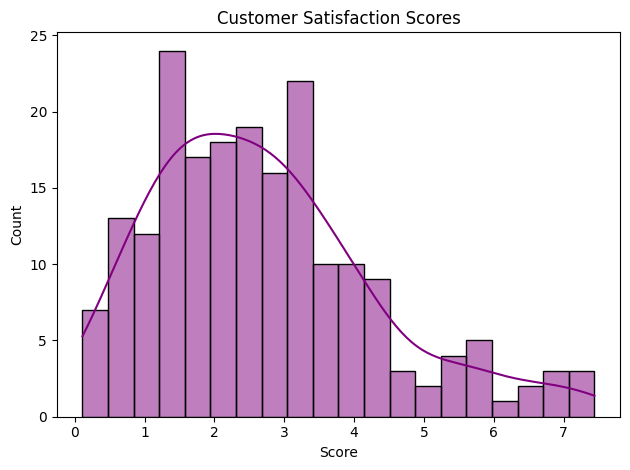

In [20]:
np.random.seed(21)
scores = np.random.beta(2, 5, 200) * 10  # Scores between 0 and 10

fig_dist, ax_dist = plt.subplots()
sns.histplot(scores, bins=20, kde=True, color='purple', ax=ax_dist)
ax_dist.set_title('Customer Satisfaction Scores')
ax_dist.set_xlabel('Score')
plt.tight_layout()
plt.show()

In [21]:
dist_text = plot2llm.convert(fig_dist, format='text')
print(dist_text)

print("\nPrompt for LLM:")
print(f"Given the following distribution plot description, summarize the overall customer satisfaction and suggest areas for improvement:\n\n{dist_text}")

Keywords in figure: bar
Plot types in figure: bar, line
Figure type: matplotlib.Figure
Dimensions (inches): [6.4, 4.8]
Title: Customer Satisfaction Scores
Number of axes: 1

Axis 0: title=Customer Satisfaction Scores, plot types: [line, bar]
  X-axis: Score (type: CATEGORY)
  Y-axis: Count (type: NUMERIC)
  Ranges: x=None, y=None
  Properties: grid=False, legend=False
  Curve points:
    Point 1: [_child20] x=categories: [0.11187110747155579, 0.14870275435379365, 0.18553440123603154, 0.2223660481182694, 0.25919769500050727, 0.2960293418827451, 0.33286098876498305, 0.3696926356472209, 0.4065242825294587, 0.44335592941169666, 0.4801875762939345, 0.5170192231761723, 0.5538508700584103, 0.5906825169406481, 0.6275141638228859, 0.6643458107051239, 0.7011774575873617, 0.7380091044695996, 0.7748407513518375, 0.8116723982340753, 0.8485040451163132, 0.8853356919985511, 0.922167338880789, 0.9589989857630268, 0.9958306326452647, 1.0326622795275024, 1.0694939264097403, 1.1063255732919781, 1.1431572